# MIDAS Task 3

Task 3: NLP
Assignment Details-
Use a given dataset to build a model to predict the category using description. Write code in python. Using Jupyter notebook is encouraged. 

1. Show how you would clean and process the data
2. Show how you would visualize this data
3. Show how you would measure the accuracy of the model
4. What ideas do you have to improve the accuracy of the model? What other algorithms would you try?

About Data : You have to clean this data, In the product category tree separate all the categories, figure out the primary category, and then use the model to predict this.
If you want to remove some categories for lack of data, you are also free to do that, mention this with explanation and some visualization.
 

Dataset link:
https://docs.google.com/spreadsheets/d/1pLv0fNE4WHokpJHUIs-FTVnmI9STgog05e658qEON0I/edit?usp=sharing

### Importing the standard libraries,

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset,

In [104]:
df= pd.read_csv("flipkart_sample.csv")

### Viewing the first five rows of the dataframe,

In [105]:
df.head() 

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# Exploring the data

### To know the length and shape of the dataframe,

In [100]:
len(df), df.shape

(20000, (20000, 15))

### Counting the missing values in the dataset,

In [4]:
df.isna().sum() 

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

### To know the datatypes of the features,

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

### Viewing all the features,

In [7]:
df.columns 

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

### To know the different values of the product category and their frequency,

In [8]:
df["product_category_tree"].value_counts()

["Jewellery >> Necklaces & Chains >> Necklaces"]                                                                                            1567
["Jewellery >> Rings"]                                                                                                                       710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]                                           522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                                                     430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]                                          332
                                                                                                                                            ... 
["Home Furnishing >> Kitchen & Dining Linen >> Kitchen Linen Sets >> Cotonex Beige Cotton Kitchen Linen Set (Pack of 2)"]         

### Plotting the value counts of the 'product_category_tree' to get a better visualisation and to make some remarks,

Text(0.5, 1.0, 'Product Category Counts')

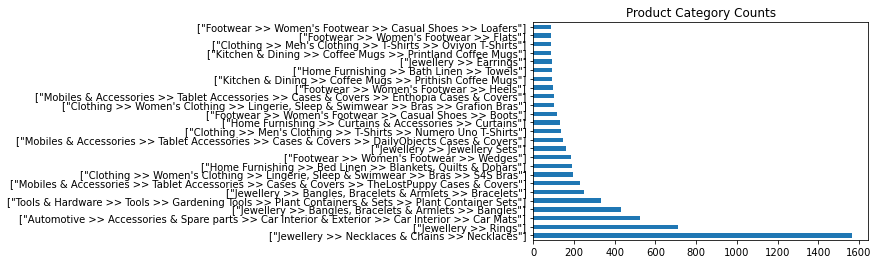

In [10]:
df.product_category_tree.value_counts().nlargest(25).plot(kind='barh')
plt.title('Product Category Counts')

### According to this plot, the category with the most products is 'Jewellery', although the categories are being repeated here due to the names not being processed, after processing the strings, this plot has been plotted again. 

### Dropping the columns insignificant to the problem and viewing the updated dataframe,

In [106]:
df.drop(columns=['crawl_timestamp','product_url','image','product_rating','overall_rating','retail_price','pid','uniq_id'], axis=1, inplace=True)
df.head()

,product_name,product_category_tree,discounted_price,is_FK_Advantage_product,description,brand,product_specifications
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",379.0,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",267.0,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",210.0,False,Specifications of Sicons All Purpose Arnica Do...,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


### Plotting the number of products by each brand,

Text(0.5, 1.0, 'Product quantities by brand')

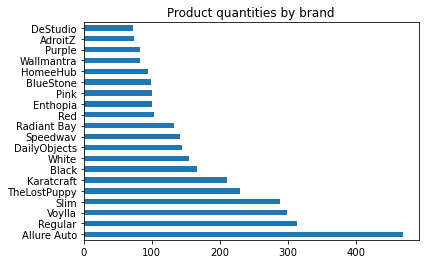

In [107]:
df.brand.value_counts().nlargest(20).plot(kind='barh')
plt.title('Product quantities by brand')

### The most selling brand is 'Allure Auto' followed by 'Regular', 'Voylla' and others.

### Plotting the 'is_FK_Advantage_product' value counts,

Text(0.5, 1.0, 'Flipkart Advantage Product count')

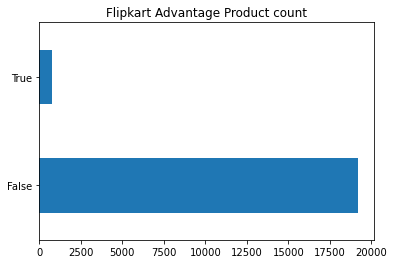

In [108]:
df.is_FK_Advantage_product.value_counts().nlargest(20).plot(kind='barh')
plt.title('Flipkart Advantage Product count')

### It can be seen that most of the products are without Flipkart advantage.

### To convert the 'discounted_price' into int datatype, looking for any missing values in this column,

In [109]:
df.isna().sum()

product_name                  0
product_category_tree         0
discounted_price             78
is_FK_Advantage_product       0
description                   2
brand                      5864
product_specifications       14
dtype: int64

### Dropping the rows with missing 'discounted price' values so that this feature can be converted to int from float for any future use that might occur,

In [110]:
df.dropna(subset=['discounted_price'],inplace=True)
df.isna().sum()

product_name                  0
product_category_tree         0
discounted_price              0
is_FK_Advantage_product       0
description                   2
brand                      5851
product_specifications       12
dtype: int64

### Changing the datatype of the price column and verifying if the change has been made,

In [111]:
df['discounted_price']=df['discounted_price'].astype(int)
df.head()

,product_name,product_category_tree,discounted_price,is_FK_Advantage_product,description,brand,product_specifications
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",379,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",22646,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",499,False,Key Features of AW Bellies Sandals Wedges Heel...,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",267,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",210,False,Specifications of Sicons All Purpose Arnica Do...,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19922 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product_name             19922 non-null  object
 1   product_category_tree    19922 non-null  object
 2   discounted_price         19922 non-null  int64 
 3   is_FK_Advantage_product  19922 non-null  bool  
 4   description              19920 non-null  object
 5   brand                    14071 non-null  object
 6   product_specifications   19910 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 1.1+ MB


### discounted_price has been successfully changed to int datatype.

### The products with maximum and minimum price respectively, that have been sold,

In [17]:
df['discounted_price'].max(), df['discounted_price'].min()

(571230, 35)

# Processing the data

### Defining a function to process the strings in categorical features,

In [113]:
def preprocess_string(str_arg):
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() 
    
    return cleaned_str 

### Processing the strings in the feature 'product_category_tree',

In [114]:
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

### Looking at the new value counts, since earlier, the category names were being repeated.

In [115]:
df.product_category_tree.value_counts()

Clothing                                                 6171
Jewellery                                                3522
Footwear                                                 1225
Mobiles & Accessories                                    1097
Automotive                                               1010
                                                         ... 
Fabpoppy Printed Women's Jumpsuit"]                         1
Style World Women Flats"]                                   1
Ruhi's Creations Cotton Floral King sized Double..."]       1
Kraft Seeds Dill Herb Seed (50 per packet)"]                1
Planet Waves Woodstock Strap (Multicolor)"]                 1
Name: product_category_tree, Length: 263, dtype: int64

Text(0.5, 1.0, 'Product Category Counts')

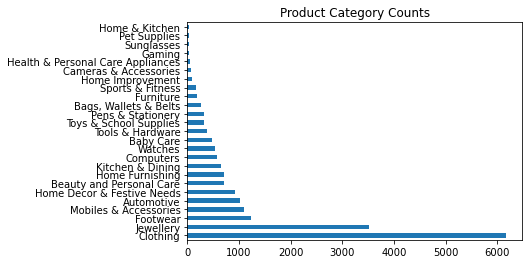

In [116]:
df.product_category_tree.value_counts().nlargest(25).plot(kind='barh')
plt.title('Product Category Counts')

### As opposed to the previous Product Category plot, the category with the most products is 'Clothing', followed by 'Jewellery', 'Footwear' and others. 

## The primary category is 'Clothing'.

### Creating a list of the top three product categories,

In [117]:
cat= ['Clothing','Jewellery','Footwear']

### Creating a new dataframe with 'description' as the feature and 'product_category_tree' as target, and choosing the top three categories (in the list 'cat') to predict with our model. Hence, taking the rows (products) with only these categories in the new dataframe ('processed_df').

In [118]:
processed_df = df[df['product_category_tree'].isin(cat)][['product_category_tree','description']]

### Viewing the processed dataframe,

In [119]:
processed_df

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
6,Clothing,Key Features of Alisha Solid Women's Cycling S...
8,Footwear,"Key Features of dilli bazaaar Bellies, Corpora..."
...,...,...
19936,Footwear,Flipkart.com: Buy Purple Women Heels only for ...
19941,Footwear,Flipkart.com: Buy Pinq Chiq Women Heels only f...
19953,Footwear,Flipkart.com: Buy La Isla Women Heels only for...
19958,Footwear,Flipkart.com: Buy We Witches Comfy Hues Women ...


### Processing the categorical data in the 'description' feature using the predefined function 'preprocess_string',

In [120]:
import re
from sklearn import preprocessing
processed_df['description'] = processed_df['description'].astype('str').apply(preprocess_string)

### Verifying the processing we did above,

In [121]:
processed_df

,product_category_tree,description
0,Clothing,key features of alisha solid women s cycling s...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
6,Clothing,key features of alisha solid women s cycling s...
8,Footwear,key features of dilli bazaaar bellies corporat...
...,...,...
19936,Footwear,flipkart com buy purple women heels only for r...
19941,Footwear,flipkart com buy pinq chiq women heels only fo...
19953,Footwear,flipkart com buy la isla women heels only for ...
19958,Footwear,flipkart com buy we witches comfy hues women w...


### Looking for any missing values in our processed dataframe,

In [122]:
processed_df.isna().sum()

product_category_tree    0
description              0
dtype: int64

# Encoding the target 'product_category_tree' to build the model,

### Initiating the encoder, it has been used to transform non-numerical labels to numerical labels.

In [123]:
enc = preprocessing.LabelEncoder()
cat_encoded=enc.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = cat_encoded

### Taking a look at the encoded dataframe,

In [124]:
processed_df

,product_category_tree,description
0,0,key features of alisha solid women s cycling s...
2,1,key features of aw bellies sandals wedges heel...
3,0,key features of alisha solid women s cycling s...
6,0,key features of alisha solid women s cycling s...
8,1,key features of dilli bazaaar bellies corporat...
...,...,...
19936,1,flipkart com buy purple women heels only for r...
19941,1,flipkart com buy pinq chiq women heels only fo...
19953,1,flipkart com buy la isla women heels only for ...
19958,1,flipkart com buy we witches comfy hues women w...


### Value count cell after encoding ,

In [125]:
processed_df.product_category_tree.value_counts()

0    6171
2    3522
1    1225
Name: product_category_tree, dtype: int64

### Here, 
### 0: Clothing
### 2: Jewellery
### 1: Footwear
### as can be seen from the previous value counts.

# Creating train and test sets

In [126]:
from sklearn.model_selection import train_test_split

np.random.seed(46) #to replicate the split every time the code is run for producing the same results again

X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.2)

### Here, X contains the feature and y contains the target.

In [127]:
X_train, y_train

(12654    tokyo talkies women s floral print casual shir...
 11443    getabhi printed tie buy purple getabhi printed...
 17279    leshya brass brass bangle set buy leshya brass...
 13093    radiant bay five stone white gold diamond k ri...
 13383    bluestone the beleca white gold diamond k ring...
                                ...                        
 884      jacknjewel gold pearl yellow gold k ring price...
 3430     cocoon stylish square toe loafers buy cocoon s...
 4076     yugshajewels brass necklace buy yugshajewels b...
 13890    ocean race graphic print men s round neck t sh...
 12906    karatcraft golden ribbon yellow gold diamond k...
 Name: description, Length: 8734, dtype: object,
 12654    0
 11443    0
 17279    2
 13093    2
 13383    2
         ..
 884      2
 3430     1
 4076     2
 13890    0
 12906    2
 Name: product_category_tree, Length: 8734, dtype: int64)

### CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#using CountVectorizer() (returns ints and counts)

vector = CountVectorizer(stop_words = 'english')
# Removing stop words
X_train_matrix = vector.fit_transform(X_train) 
X_test_matrix = vector.transform(X_test) 

# Creating the model

### Since we have a categorical feature, Naive Bayes Classifier has to be used. Training the model on X_train_matrix, y_train, and scoring on X_test_matrix, y_test, and printing the classification report.

In [129]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_matrix, y_train)
clf.score(X_test_matrix, y_test)
prediction=clf.predict(X_test_matrix)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1180
           1       0.98      0.98      0.98       257
           2       0.99      1.00      0.99       747

    accuracy                           0.99      2184
   macro avg       0.99      0.99      0.99      2184
weighted avg       0.99      0.99      0.99      2184



### Accuracy,

In [133]:
score1= clf.score(X_test_matrix, y_test)
score1

0.9935897435897436

### Comparing the predicted values and the actual y_test values,

In [131]:
prediction, y_test

(array([0, 0, 0, ..., 0, 1, 0]),
 15629    0
 14440    0
 7811     0
 16707    0
 3357     1
         ..
 5813     2
 13997    0
 12345    0
 3353     1
 17745    0
 Name: product_category_tree, Length: 2184, dtype: int64)

## Using TfidVectorizer (returns floats and assigns a score)

In [134]:
Tfidvector = TfidfVectorizer(stop_words = 'english')
# Removing stop words
X_train_matrix = Tfidvector.fit_transform(X_train) 
X_test_matrix = Tfidvector.transform(X_test)

### Training and scoring the model again after using TfidVectorizer,

In [135]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB()
clf1.fit(X_train_matrix, y_train)
clf1.score(X_test_matrix, y_test)
prediction=clf1.predict(X_test_matrix)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1180
           1       1.00      0.94      0.97       257
           2       0.98      1.00      0.99       747

    accuracy                           0.99      2184
   macro avg       0.99      0.98      0.99      2184
weighted avg       0.99      0.99      0.99      2184



# Accuracies,

## Score by the CountVectorizer model,

In [137]:
score1

0.9935897435897436

## Score by the TfidVectorizer model,

In [139]:
score2=clf.score(X_test_matrix, y_test)
score2

0.9963369963369964

# Taking more features,

In [41]:
df1= pd.read_csv("flipkart_sample.csv")
df1.drop(columns=['crawl_timestamp','product_url','image','product_rating','overall_rating','retail_price','pid','uniq_id'], axis=1, inplace=True)
df1.head()

,product_name,product_category_tree,discounted_price,is_FK_Advantage_product,description,brand,product_specifications
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",379.0,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",267.0,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",210.0,False,Specifications of Sicons All Purpose Arnica Do...,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


### Preprocessing the data as done previously by defining the functions,

In [42]:
def preprocess_string(str_arg):
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() 
    
    return cleaned_str 

In [43]:
df1['product_category_tree'] = df1['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

### This time, taking one more feature 'product_name',

In [44]:
new_df = df[df['product_category_tree'].isin(cat)][['product_name','product_category_tree','description','brand']]
new_df

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
2,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
6,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar
...,...,...,...,...
19936,Purple Women Heels,Footwear,Flipkart.com: Buy Purple Women Heels only for ...,NaN
19941,Pinq Chiq Women Heels,Footwear,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN
19953,La Isla Women Heels,Footwear,Flipkart.com: Buy La Isla Women Heels only for...,NaN
19958,We Witches Comfy Hues Women Wedges,Footwear,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN


In [47]:
new_df.info(), new_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10918 entries, 0 to 19962
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_name           10918 non-null  object
 1   product_category_tree  10918 non-null  object
 2   description            10917 non-null  object
 3   brand                  7031 non-null   object
dtypes: object(4)
memory usage: 426.5+ KB


(None,
 product_name                0
 product_category_tree       0
 description                 1
 brand                    3887
 dtype: int64)

### Preprocessing the strings,

In [48]:
import re
from sklearn import preprocessing
new_df['description'] = new_df['description'].astype('str').apply(preprocess_string)
new_df['product_name'] = new_df['product_name'].astype('str').apply(preprocess_string)
new_df

,product_name,product_category_tree,description,brand
0,alisha solid women s cycling shorts,Clothing,key features of alisha solid women s cycling s...,Alisha
2,aw bellies,Footwear,key features of aw bellies sandals wedges heel...,AW
3,alisha solid women s cycling shorts,Clothing,key features of alisha solid women s cycling s...,Alisha
6,alisha solid women s cycling shorts,Clothing,key features of alisha solid women s cycling s...,Alisha
8,dilli bazaaar bellies corporate casuals casuals,Footwear,key features of dilli bazaaar bellies corporat...,dilli bazaaar
...,...,...,...,...
19936,purple women heels,Footwear,flipkart com buy purple women heels only for r...,NaN
19941,pinq chiq women heels,Footwear,flipkart com buy pinq chiq women heels only fo...,NaN
19953,la isla women heels,Footwear,flipkart com buy la isla women heels only for ...,NaN
19958,we witches comfy hues women wedges,Footwear,flipkart com buy we witches comfy hues women w...,NaN


### Dropping the 'brand' column due to many missing values,

In [88]:
new1_df= new_df.drop(['brand'],axis=1)
new1_df

,product_name,product_category_tree,description
0,alisha solid women s cycling shorts,Clothing,key features of alisha solid women s cycling s...
2,aw bellies,Footwear,key features of aw bellies sandals wedges heel...
3,alisha solid women s cycling shorts,Clothing,key features of alisha solid women s cycling s...
6,alisha solid women s cycling shorts,Clothing,key features of alisha solid women s cycling s...
8,dilli bazaaar bellies corporate casuals casuals,Footwear,key features of dilli bazaaar bellies corporat...
...,...,...,...
19936,purple women heels,Footwear,flipkart com buy purple women heels only for r...
19941,pinq chiq women heels,Footwear,flipkart com buy pinq chiq women heels only fo...
19953,la isla women heels,Footwear,flipkart com buy la isla women heels only for ...
19958,we witches comfy hues women wedges,Footwear,flipkart com buy we witches comfy hues women w...


### Encoding the target, 'product_category_tree',

In [89]:
enc = preprocessing.LabelEncoder()
cat_encoded=enc.fit_transform(new1_df['product_category_tree'])
new1_df['product_category_tree'] = cat_encoded
new1_df

,product_name,product_category_tree,description
0,alisha solid women s cycling shorts,0,key features of alisha solid women s cycling s...
2,aw bellies,1,key features of aw bellies sandals wedges heel...
3,alisha solid women s cycling shorts,0,key features of alisha solid women s cycling s...
6,alisha solid women s cycling shorts,0,key features of alisha solid women s cycling s...
8,dilli bazaaar bellies corporate casuals casuals,1,key features of dilli bazaaar bellies corporat...
...,...,...,...
19936,purple women heels,1,flipkart com buy purple women heels only for r...
19941,pinq chiq women heels,1,flipkart com buy pinq chiq women heels only fo...
19953,la isla women heels,1,flipkart com buy la isla women heels only for ...
19958,we witches comfy hues women wedges,1,flipkart com buy we witches comfy hues women w...


In [90]:
new2_df= new1_df.drop(['product_category_tree'],axis=1)
new2_df

,product_name,description
0,alisha solid women s cycling shorts,key features of alisha solid women s cycling s...
2,aw bellies,key features of aw bellies sandals wedges heel...
3,alisha solid women s cycling shorts,key features of alisha solid women s cycling s...
6,alisha solid women s cycling shorts,key features of alisha solid women s cycling s...
8,dilli bazaaar bellies corporate casuals casuals,key features of dilli bazaaar bellies corporat...
...,...,...
19936,purple women heels,flipkart com buy purple women heels only for r...
19941,pinq chiq women heels,flipkart com buy pinq chiq women heels only fo...
19953,la isla women heels,flipkart com buy la isla women heels only for ...
19958,we witches comfy hues women wedges,flipkart com buy we witches comfy hues women w...


In [91]:
new2_df.isna().sum(), new1_df.isna().sum()

(product_name    0
 description     0
 dtype: int64,
 product_name             0
 product_category_tree    0
 description              0
 dtype: int64)

### Splitting into train and test sets,

In [92]:
from sklearn.model_selection import train_test_split

np.random.seed(46) #to replicate the split every time the code is run for producing the same results again

X_train1, X_test1, y_train1, y_test1 = train_test_split(new2_df,new1_df['product_category_tree'],test_size=0.2)

In [93]:
#using CountVectorizer() (returns ints and counts)

vector = CountVectorizer(stop_words = 'english')
# Removing stop words
X_train_matrix1 = vector.fit_transform(X_train1) 
X_test_matrix1 = vector.transform(X_test1) 

In [86]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB()
clf2.fit(X_train_matrix1, y_train1)
clf2.score(X_test_matrix1, y_test1)
prediction=clf2.predict(X_test_matrix1)
print(classification_report(y_test1,prediction))

ValueError: Found input variables with inconsistent numbers of samples: [2, 8734]

### Not being able to rectify this error.